In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Set variables

In [3]:
# specify the date range we wish to plot
date_range = pd.date_range('01-01-1995', datetime.today().date())

## Load in data from the csv file and make sure it looks correct

In [4]:
csv_url = "https://raw.githubusercontent.com/organizejs/collective-actions-in-tech/master/actions.csv"
df = pd.read_csv(csv_url, index_col=0)
df['date'] = pd.to_datetime(df['date']) # cast date col to datetime64
df.head()

,date,sources,actions,struggles,description,locations,companies,workers,tags,author
0,1979-09-01,https://twitter.com/clancynewyork/status/11758...,protest,ethics,"IBM workers formed an organization, IBM: Speak...",worldwide,ibm,None,"international_solidarity, white_collar_workers",nataliyaned
1,1986-09-16,https://www.nytimes.com/1986/09/16/science/sof...,open_letter,ethics,Fourteen employees at AT&T sign a letter warni...,usa,at&t,14,white_collar_workers,nataliyaned
2,1986-09-16,https://www.nytimes.com/1986/09/16/science/sof...,open_letter,ethics,"A group of computer professionals, led by Comp...",usa,None,30,white_collar_workers,nataliyaned
3,1994-01-24,https://www.nytimes.com/1994/06/12/magazine/ba...,open_letter,ethics,Computer Professionals for Social Responsibili...,online,None,50000,white_collar_workers,nataliyaned
4,1998-11-23,http://www.cnn.com/tech/computing/9811/23/mste...,legal_action,"unfair_labor_practices, pay_and_benefits",A law firm representing 10 current and former ...,usa,microsoft,10,contract_workers,organizejs


## Visualize total actions per year

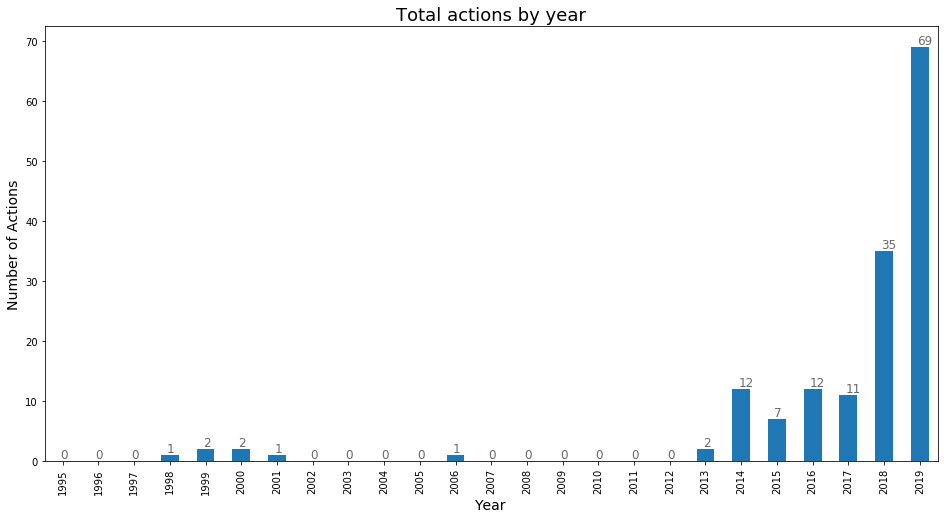

In [5]:
# fill dataframe with zeros for dates where no actions happened
sparse_df = df.loc[:, 'date'].value_counts()

# fill dataframe with zeros for dates where no actions happened
sparse_df = df.loc[:, 'date'].value_counts().reindex(date_range, fill_value=0).to_frame(name='count')

# aggregate our dataframe by year
yearly_df = sparse_df.groupby([sparse_df.index.year.rename('year')]).agg({'sum'})

# plot the bar graph with annotation
ax = yearly_df.plot(kind='bar', figsize=(16, 8), legend=False)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Actions", fontsize=14)
ax.set_title("Total actions by year", fontsize=18)
for i in ax.patches:
    ax.text(
        i.get_x()+.175, 
        i.get_height()+.5,
        i.get_height(), 
        fontsize=12,
        color='dimgrey'
    )

## Visualize total distribution of struggle

Text(0.5, 1.0, 'Actions by kind of struggle')

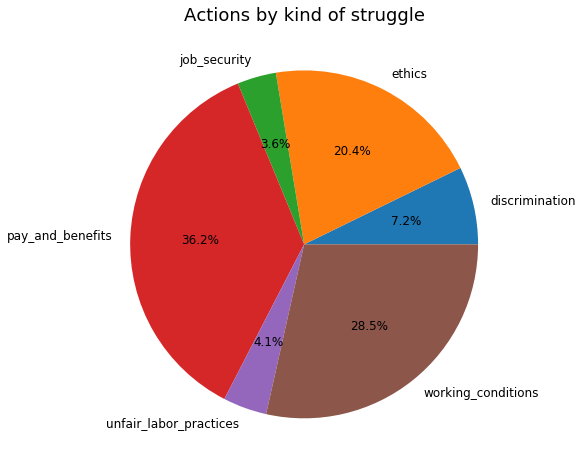

In [6]:
struggles = (df['struggles'].str
    .split(r'\s*,\s*', expand=True)
    .apply(pd.Series.value_counts, 1)
    .fillna(0, downcast='infer'))

ax = struggles.sum().plot(kind='pie', autopct='%1.1f%%', fontsize=12, figsize=(8,8))
ax.set_ylabel(None)
ax.set_title("Actions by kind of struggle", fontsize=18)

## Visualize distribution of struggles over the years

Text(0, -100, '\nNote: Multiple types of struggles can be associated to a single action, so some actions are counted multiple times.\n')

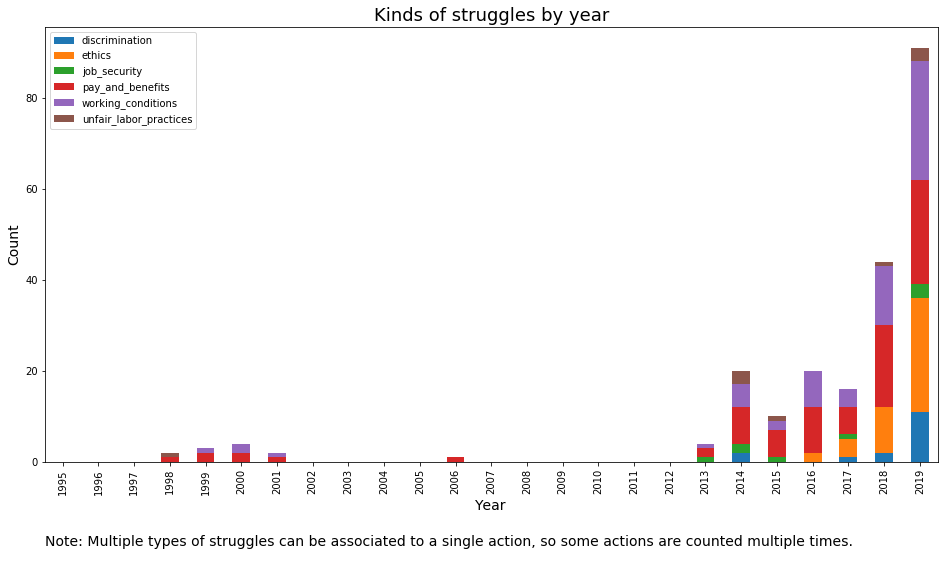

In [7]:
list_of_struggles = [
    "discrimination", 
    "ethics", 
    "job_security", 
    "pay_and_benefits", 
    "working_conditions", 
    "unfair_labor_practices"
]

# join our struggles df and group by date
struggles_df = pd.concat([df, struggles], axis=1)[["date"] + list_of_struggles]
struggles_df = struggles_df.groupby(by="date").sum().reindex(date_range, fill_value=0)

# group by year and flatten the columns
yearly_df = struggles_df.groupby([struggles_df.index.year.rename('year')]).agg({'sum'})
yearly_df.columns = yearly_df.columns.get_level_values(0)

# plot the bar grpah
ax = yearly_df.plot(kind='bar', stacked=True, figsize=(16, 8))
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Kinds of struggles by year", fontsize=18)
footnote = """
Note: Multiple types of struggles can be associated to a single \
action, so some actions are counted multiple times.
"""
ax.annotate(footnote, (0, 0), (0, -100), xycoords='axes fraction', textcoords='offset points', fontsize=14)

## Using word clouds

Define some helper funcs

In [8]:
# color generator function
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return("hsl(230,100%%,%d%%)" % np.random.randint(30,60))

# helper function to get words from df columns
def get_text(col):
    return df[col].str.cat(sep=" ").replace(",", "").replace("None", "")

# helper func to pot word cloud
def plot_cloud(text, figsize=(18,12)):
    wc_params = {
        "background_color": "white", 
        "width": figsize[0]*100, 
        "height": figsize[1]*100, 
        "collocations": False
    }
    wc = WordCloud(**wc_params).generate(text)
    wc.recolor(color_func = grey_color_func)
    plt.figure(figsize=figsize)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

Visualize descriptions

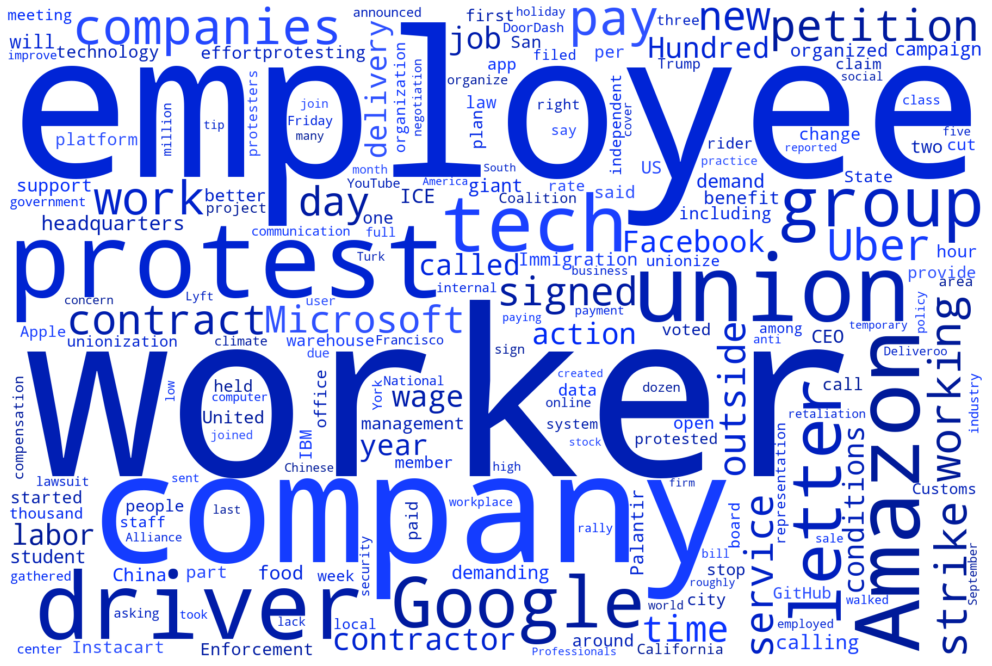

In [9]:
text = get_text('description')
plot_cloud(text)

visualize tags

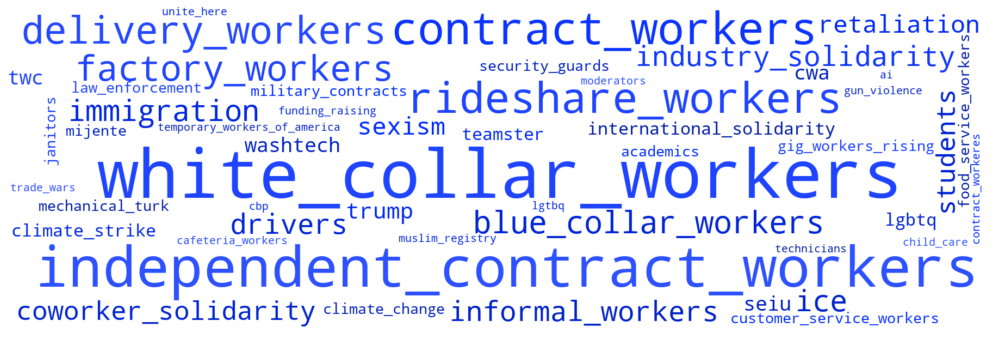

In [10]:
text = get_text('tags')
plot_cloud(text, figsize=(18, 6))

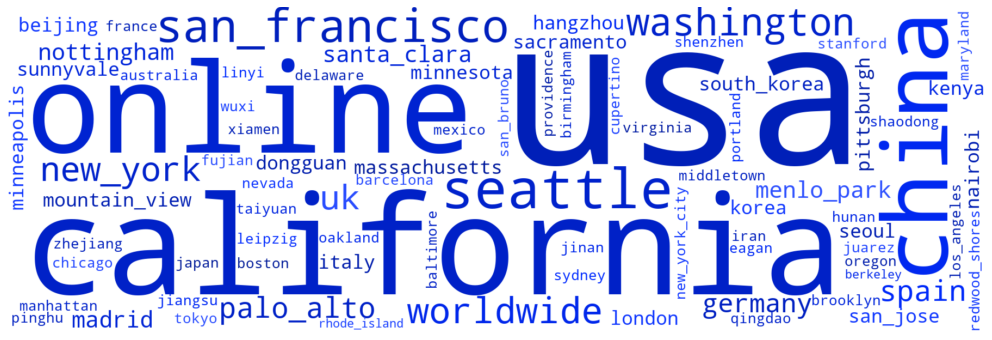

In [11]:
text = get_text('locations')
plot_cloud(text, figsize=(18, 6))